# Scikit-learn

This notebook contains a clear and consise overview of the [scikit-learn Python library](https://scikit-learn.org/stable/index.html)

Scikit-learn is Python's most usable and robust machine learning library. It uses a Python consistency interface to give a set of fast tools for machine learning and statistical modeling, such as classification a regression.

Scikit-learn is a Python library that provides a standard interface for [Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning) and [Unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning).

## Supervised learning

A labeled dataset is used to train a supervised learning algorithm. A labeled data set has input and output parameters. The process of an algorithm learning from the training dataset may be thought of as a teacher supervising the learning process, it's termed supervised learning. 

Supervised learning is further grouped into <b>Regression</b> and <b>Classification</b>.

<b>Regression:</b> Predicting the value of an object's continuous-valued attribute.

<b>Classification:</b> Identifying the category to which an object belongs.

more can be found on [scikit-learn](https://scikit-learn.org/stable/supervised_learning.html).

## Unsupervised learning.

Unsupervised learning refers to a group of machine learning techniques that are used to discover patterns in data. Unsupervised algorithms are given not labelled data, which means that just the input variables are provided, with no matching output variables. In unsupervised learning, the algorithms are left to their own devices to find interesting patterns in the data.

Supervised learning is further grouped into <b>Clustering</b> and <b>Dimensionality reduction</b>.

<b>Clustering:</b> Objects that are related are automatically grouped into sets.

<b>Dimensionality reduction:</b> Reducing the number of random variables that must be taken into account.

more can be found [scikit-learn](https://scikit-learn.org/stable/unsupervised_learning.html)

## Difference between Supervised and Unsupervised Learning

- <b>Supervised Learning</b>
    -  Classification and Regression
    - Used for prediction
    - Input data is labelled
    - Uses training dataset
<br>  


- <b>Unsupervised Learning</b>
    - Clustering, dimensionality reduction etc
    - Used for analysis
    - Input data is not labelled
    - Uses only input dataset

## Classification Analysis: Wine Data Set

[Wine Quality Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

I will perfome classification analysis on the red wine data set

### Setup

***

In [1]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

In [2]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard coloir scheme.
plt.style.use('ggplot')

### Displaying the Wine Dataset

***

In [3]:
# Load the red wine dataset from UCI Machine Learning Repository
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [4]:
# Have a look at the data
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [5]:
# Summary statistics
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [6]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Correlation
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

In [8]:
# Create generic wine quality labels
bins = (2, 6.5, 8)
labels = ['bad', 'good']
df['quality'] = pd.cut(x = df['quality'], bins = bins, labels = labels)

In [9]:
# Count how many wines fit the labels
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

### Visualise

***

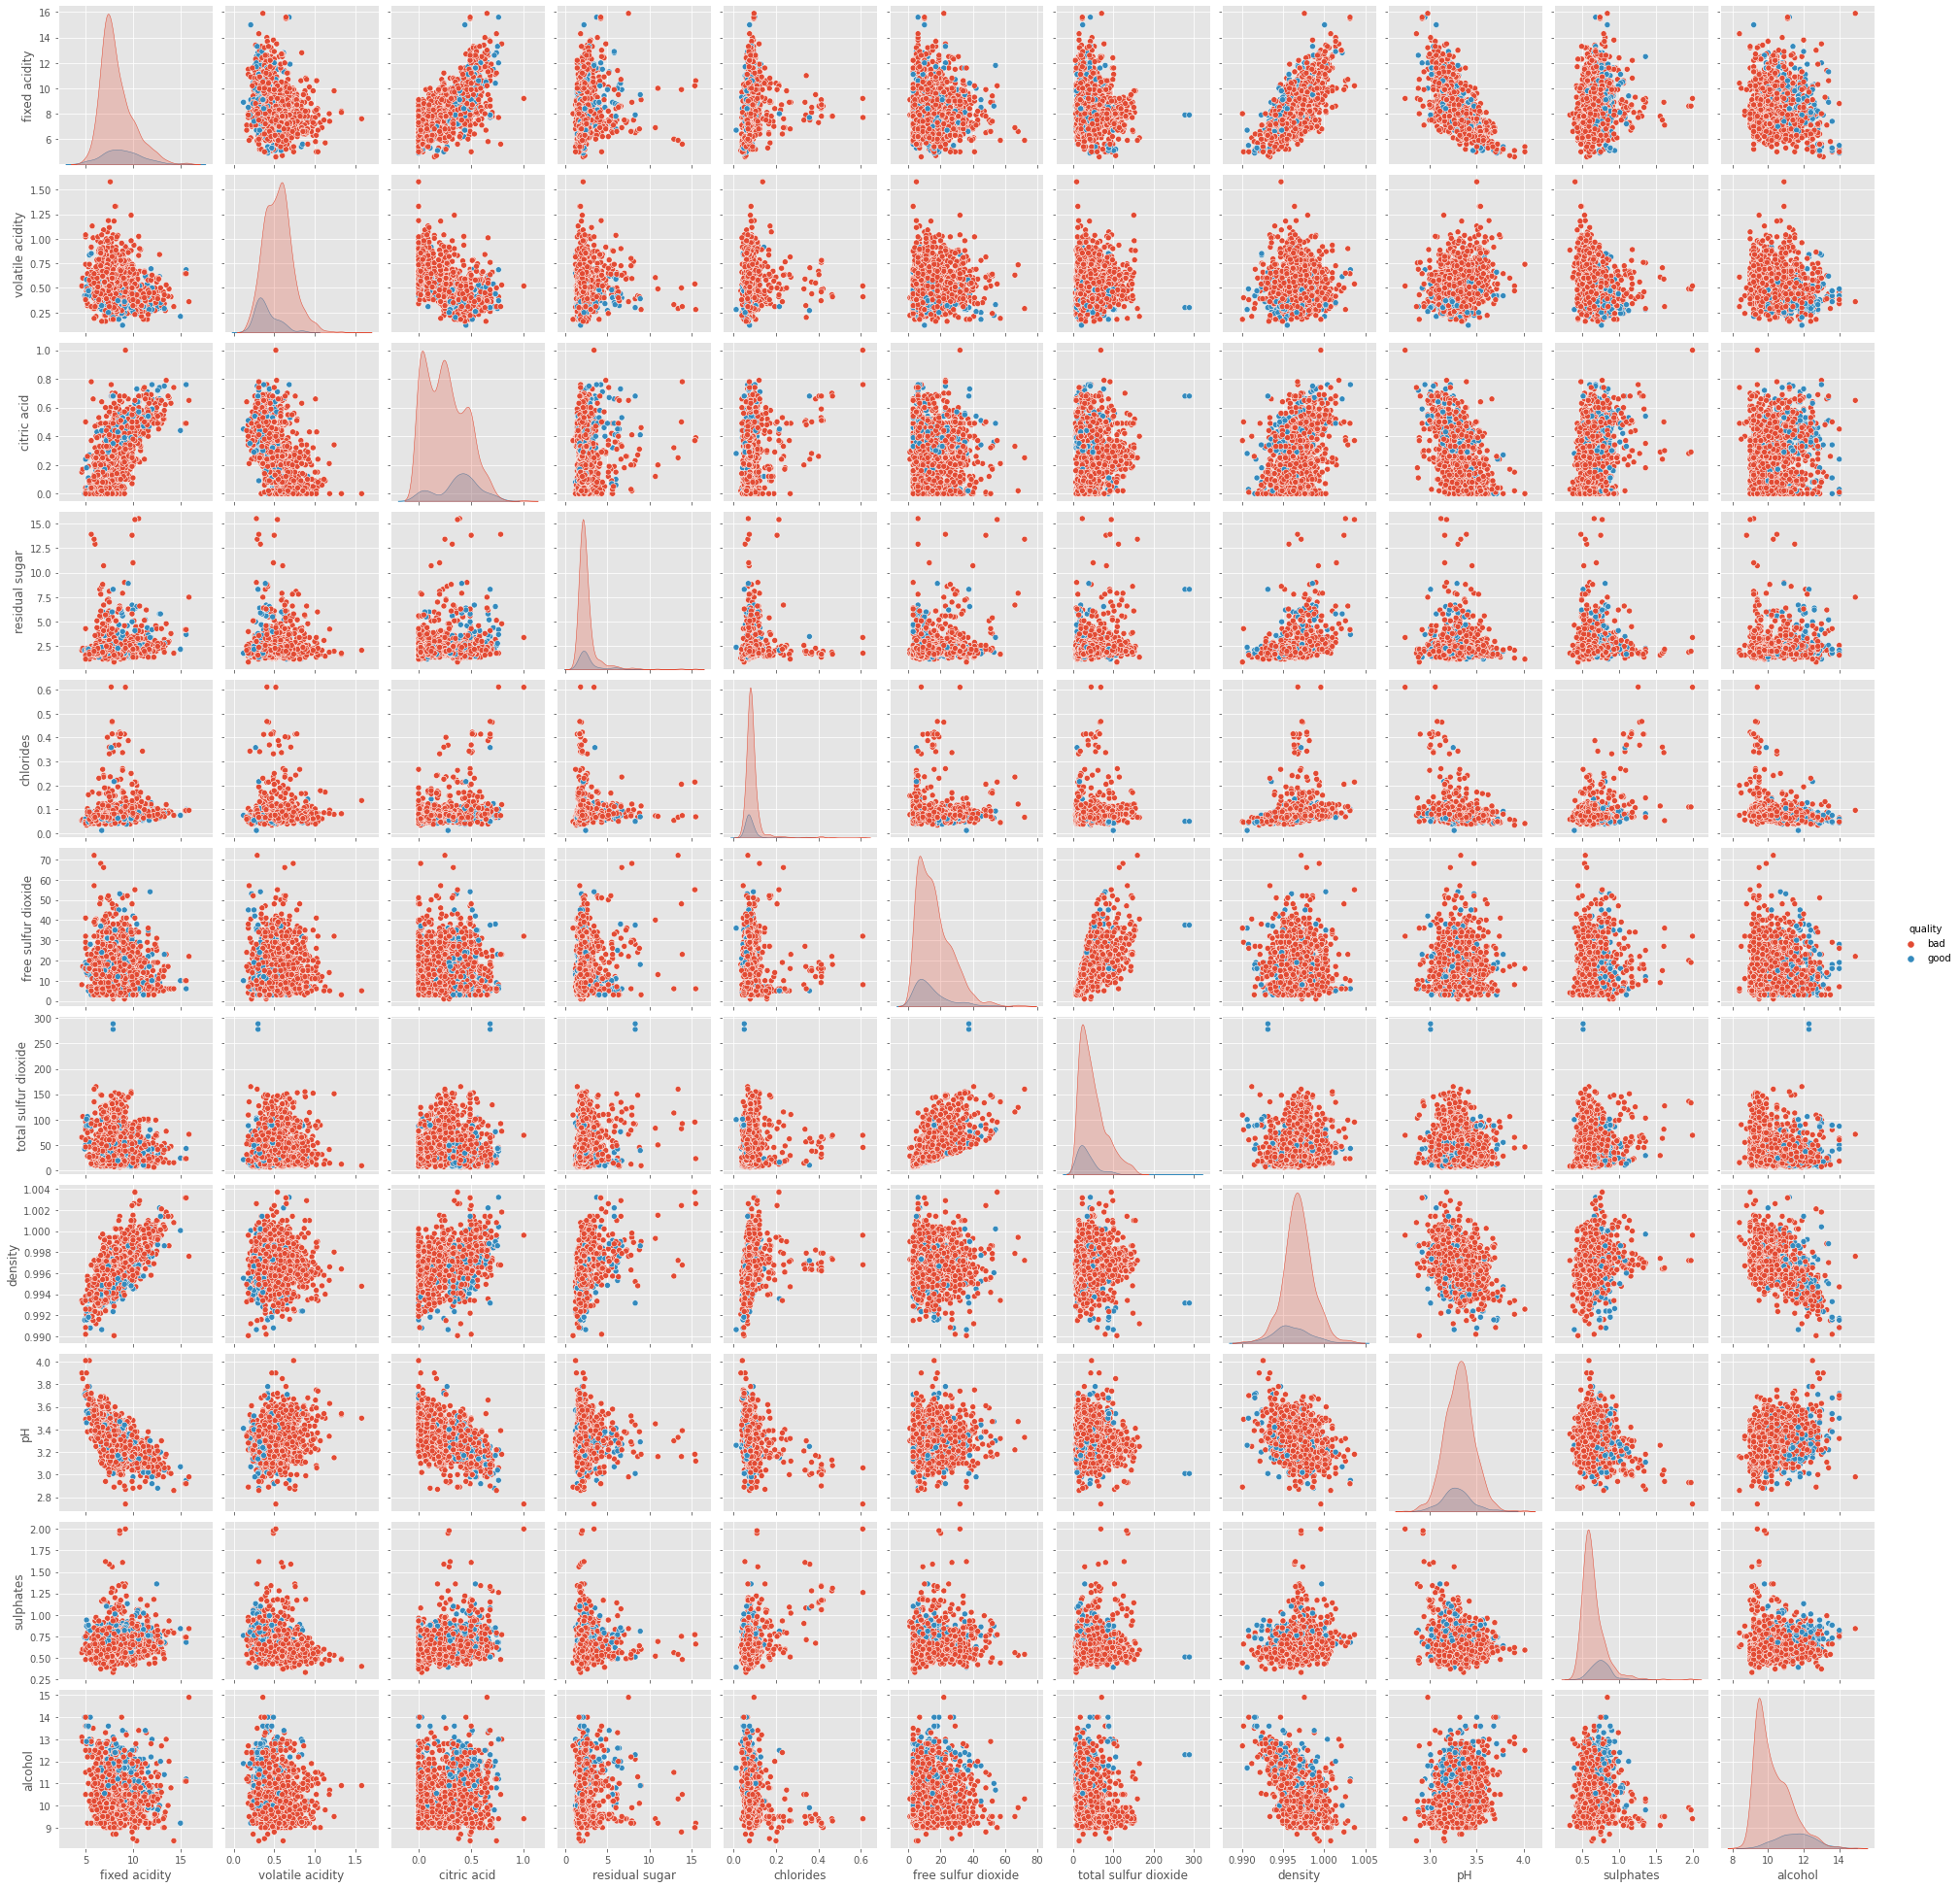

In [10]:
# Scatter plots and kdes.
sns.pairplot(df, hue='quality')

### Two Dimensions

***

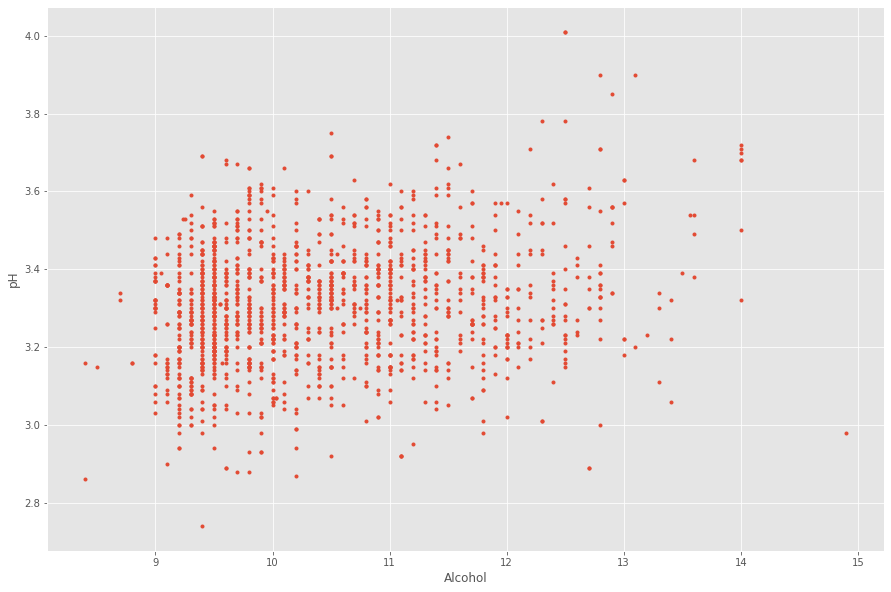

In [11]:
# New figure.
fig, ax = plt.subplots()

# Scatter plot.
ax.plot(df['alcohol'], df['pH'], '.')

# Set axis labels.
ax.set_xlabel('Alcohol');
ax.set_ylabel('pH');

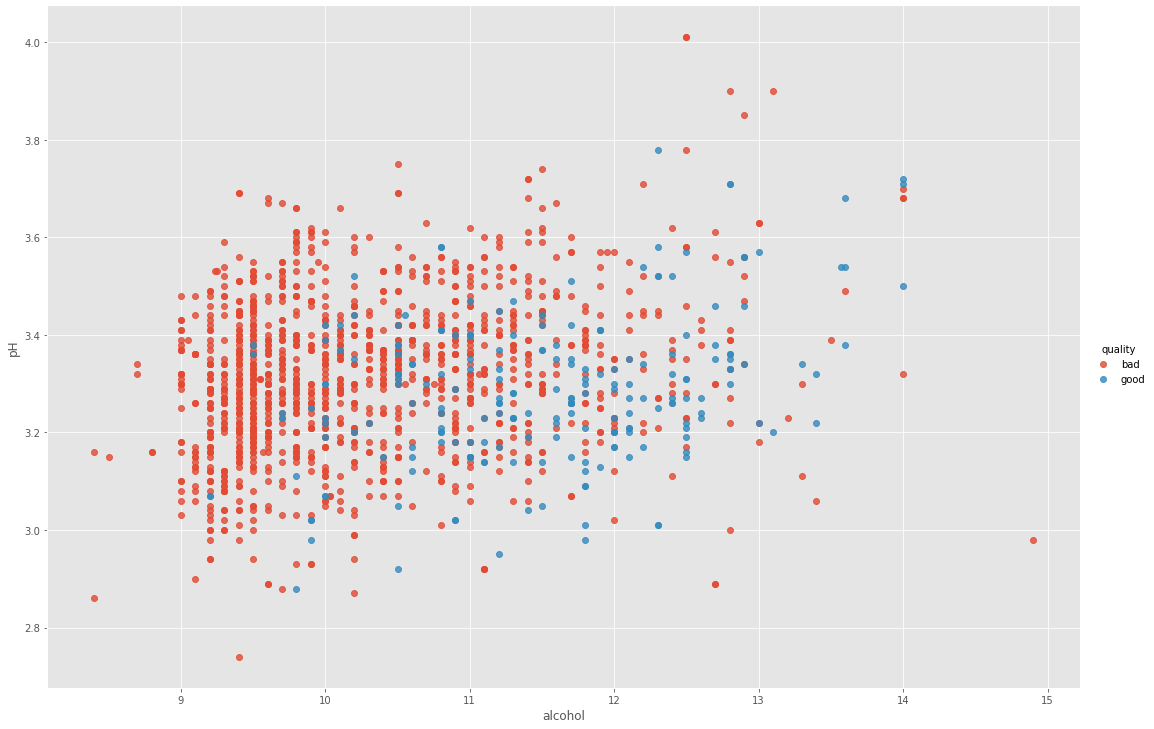

In [12]:
# Seaborn is great for creating complex plots with one command.
sns.lmplot(x="alcohol", y="pH", hue='quality', data=df, fit_reg=False, height=10, aspect=1.5);

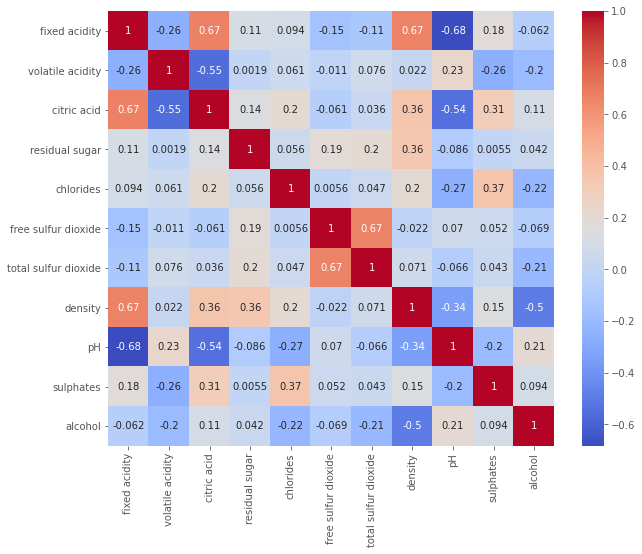

In [13]:
# Heatmap
corr = df.corr()
#Plot figsize
plt.figure(figsize=(10, 8))
# Generate heat map
sns.heatmap(corr,annot=True,cmap="coolwarm")
# Show plot
plt.show()

### Using PyPlot

***

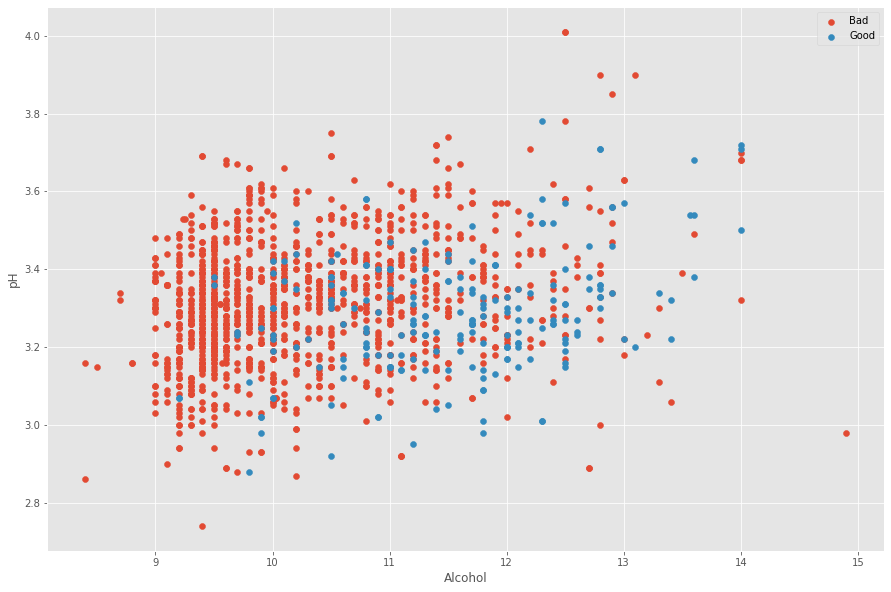

In [14]:
# Segregate the data.
bad = df[df['quality'] == 'bad']
good = df[df['quality'] == 'good']

# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(bad['alcohol'], bad['pH'], label='Bad')
ax.scatter(good['alcohol'], good['pH'], label='Good')

# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('pH')
ax.legend();

In [15]:
# How the segregation works
df['quality'] == 'bad'

0       True
1       True
2       True
3       True
4       True
        ... 
1594    True
1595    True
1596    True
1597    True
1598    True
Name: quality, Length: 1599, dtype: bool

In [16]:
df[df['quality'] == 'bad'].head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4     bad  
1      9.8     bad  
2      9.8     bad  
3      9.8     bad  
4      9.4     bad

### Using GroupBy()

***

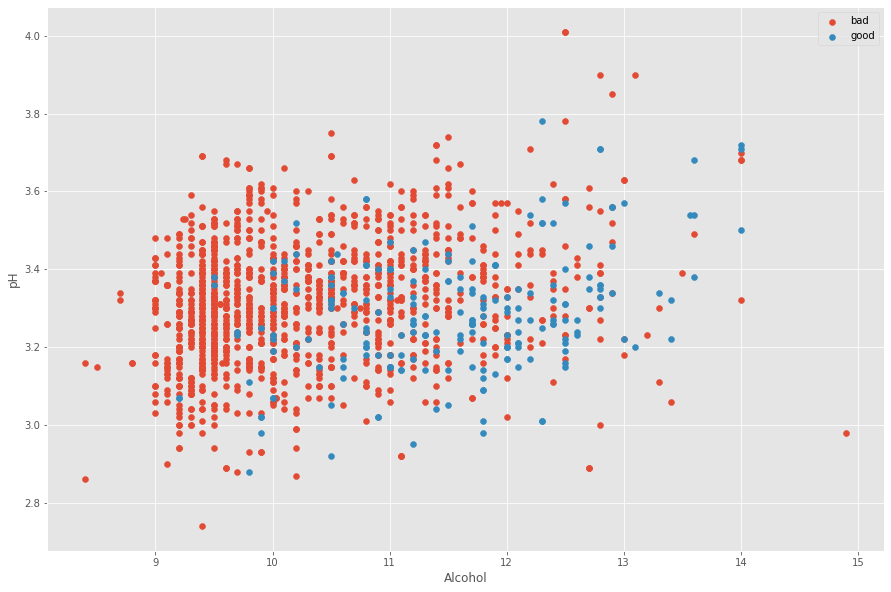

In [17]:
# New plot.
fig, ax = plt.subplots()

# Using pandas groupby().
for species, data in df.groupby('quality'):
    ax.scatter(data['alcohol'], data['pH'], label=species)
    
# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('pH')
ax.legend();

In [18]:
# Group by typically takes a categorical variable.
x = df.groupby('quality')
x

In [19]:
# Pivot tables.
x.mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
bad           8.236831          0.547022     0.254407        2.512120   
good          8.847005          0.405530     0.376498        2.708756   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
bad       0.089281            16.172214             48.285818  0.996859   
good      0.075912            13.981567             34.889401  0.996030   

               pH  sulphates    alcohol  
quality                                  
bad      3.314616   0.644754  10.251037  
good     3.288802   0.743456  11.518049

In [20]:
# Looping through groupby()
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: 'bad'
j looks like:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol quality  
0      9.4     bad  
1      9.8     bad  
2      9.8     bad  


i is: 'good'
j looks like:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
7             7.3              0.65         0.00             1.2      0.065   
8             7.8              0.58         0.02             2.0      0.073   
16           

### Test & Train Split

***

In [21]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [22]:
# Show some training data.
train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1325            6.7              0.46         0.24             1.7      0.077   
74              9.7              0.32         0.54             2.5      0.094   
1276            8.5              0.40         0.40             6.3      0.050   
56             10.2              0.42         0.57             3.4      0.070   
1128           10.0              0.43         0.33             2.7      0.095   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1325                 18.0                  34.0  0.99480  3.39       0.60   
74                   28.0                  83.0  0.99840  3.28       0.82   
1276                  3.0                  10.0  0.99566  3.28       0.56   
56                    4.0                  10.0  0.99710  3.04       0.63   
1128                 28.0                  89.0  0.99840  3.22       0.68   

      alcohol quality  
1325     10.6     bad  
74        9.6     bad  
1276     12.0     bad  
56        9.6     bad  
1128     10.0     bad

In [23]:
# The indicies of the train array.
train.index

Int64Index([1325,   74, 1276,   56, 1128,  131,  813,  378, 1390,  899,
            ...
             621, 1537, 1038, 1367,  782, 1313,  492,  581, 1296, 1136],
           dtype='int64', length=1199)

In [24]:
# Show some testing data.
test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
972            10.1             0.380         0.50             2.4      0.104   
1382            8.0             0.600         0.22             2.1      0.080   
1137           10.4             0.520         0.45             2.0      0.080   
629             7.6             0.685         0.23             2.3      0.111   
24              6.9             0.400         0.14             2.4      0.085   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
972                   6.0                  13.0  0.99643  3.22       0.65   
1382                 25.0                 105.0  0.99613  3.30       0.49   
1137                  6.0                  13.0  0.99774  3.22       0.76   
629                  20.0                  84.0  0.99640  3.21       0.61   
24                   21.0                  40.0  0.99680  3.43       0.63   

      alcohol quality  
972      11.6    good  
1382      9.9     bad  
1137     11.4     bad  
629       9.3     bad  
24        9.7     bad

In [25]:
# Remaining rows length 
test.index.size

400

### Two Dimensions: Test Train Split

***

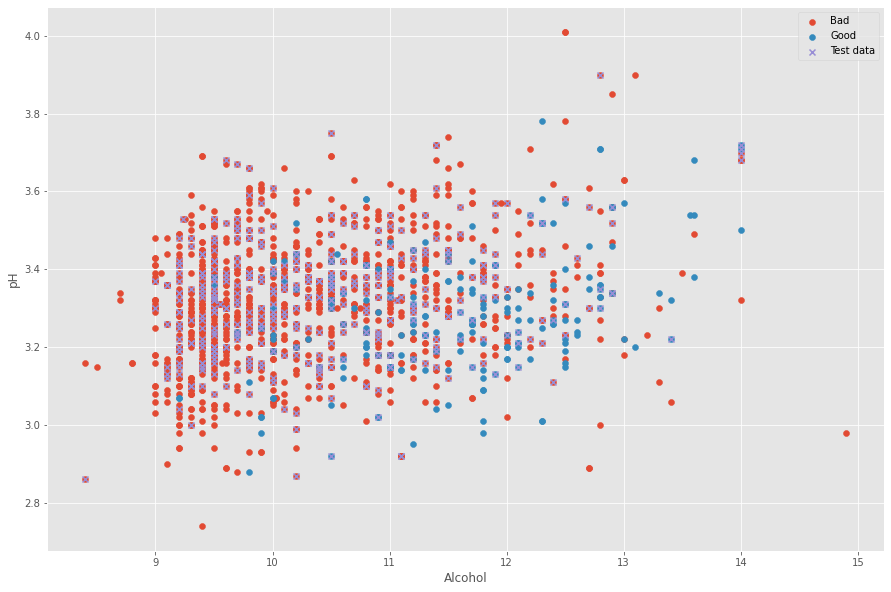

In [26]:
# Segregate the training data.
setos = train[train['quality'] == 'bad']
versi = train[train['quality'] == 'good']

# New plot.
fig, ax = plt.subplots()

# Scatter plots for training data.
ax.scatter(bad['alcohol'], bad['pH'], marker='o', label='Bad')
ax.scatter(good['alcohol'], good['pH'], marker='o', label='Good')

# Scatter plot for testing data.
ax.scatter(test['alcohol'], test['pH'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('pH')
ax.legend();

### Two Dimensions: Inputs and Outputs

***

In [27]:
# Give the inputs and outputs convenient names.
inputs, outputs = train[['alcohol', 'pH']], train['quality']

In [28]:
# Peek at the inputs.
inputs.head()

alcohol    pH
1325     10.6  3.39
74        9.6  3.28
1276     12.0  3.28
56        9.6  3.04
1128     10.0  3.22

In [29]:
# Peek at the outputs.
outputs.head()

1325    bad
74      bad
1276    bad
56      bad
1128    bad
Name: quality, dtype: category
Categories (2, object): ['bad' < 'good']

### Two Dimensions: Logistic regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

***

In [30]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [31]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['alcohol', 'pH']])
predictions

array(['bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad',
       'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'bad',
       'bad',

In [32]:
# Eyeball the misclassifications.
predictions == test['quality']

972     False
1382     True
1137     True
629      True
24       True
        ...  
1009     True
939      True
1263     True
1593     True
1221     True
Name: quality, Length: 400, dtype: bool

In [33]:
# What proportion were correct?
lre.score(test[['alcohol', 'pH']], test['quality'])

0.895

### Two Dimensions: Misclassified

***

In [34]:
# Append a column to the test data frame with the predictions.
test['predicted'] = predictions
test.head()

<ipython-input-34-7f2fd5111565>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
972            10.1             0.380         0.50             2.4      0.104   
1382            8.0             0.600         0.22             2.1      0.080   
1137           10.4             0.520         0.45             2.0      0.080   
629             7.6             0.685         0.23             2.3      0.111   
24              6.9             0.400         0.14             2.4      0.085   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
972                   6.0                  13.0  0.99643  3.22       0.65   
1382                 25.0                 105.0  0.99613  3.30       0.49   
1137                  6.0                  13.0  0.99774  3.22       0.76   
629                  20.0                  84.0  0.99640  3.21       0.61   
24                   21.0                  40.0  0.99680  3.43       0.63   

      alcohol quality predicted  
972      11.6    good       bad  
1382      9.9     bad       bad  
1137     11.4     bad       bad  
629       9.3     bad       bad  
24        9.7     bad       bad

In [35]:
# Show the misclassified data.
misclass = test[test['predicted'] != test['quality']]
misclass

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
972            10.1             0.380         0.50            2.40      0.104   
657            12.0             0.500         0.59            1.40      0.073   
1201            7.9             0.340         0.36            1.90      0.065   
1449            7.2             0.380         0.31            2.00      0.056   
1270            5.0             0.380         0.01            1.60      0.048   
638             7.7             0.915         0.12            2.20      0.143   
144             5.2             0.340         0.00            1.80      0.050   
1035           10.1             0.370         0.34            2.40      0.085   
1106            8.2             0.230         0.42            1.90      0.069   
986             9.8             0.340         0.39            1.40      0.066   
358            11.9             0.430         0.66            3.10      0.109   
230             5.2             0.480         0.04            1.60      0.054   
1059            8.9             0.480         0.53            4.00      0.101   
290             8.7             0.520         0.09            2.50      0.091   
1451            7.8             0.320         0.44            2.70      0.104   
903             6.8             0.590         0.06            6.00      0.060   
564            13.0             0.470         0.49            4.30      0.085   
948             8.9             0.120         0.45            1.80      0.075   
887            10.7             0.520         0.38            2.60      0.066   
421             6.6             0.840         0.03            2.30      0.059   
1323            9.1             0.360         0.39            1.80      0.060   
1156            8.5             0.180         0.51            1.75      0.071   
425             6.6             0.840         0.03            2.30      0.059   
797             9.3             0.370         0.44            1.60      0.038   
1208            7.2             0.360         0.46            2.10      0.074   
330            10.2             0.360         0.64            2.90      0.122   
1024            7.7             0.580         0.01            1.80      0.088   
423            10.5             0.240         0.47            2.10      0.066   
1209            6.2             0.390         0.43            2.00      0.071   
982             7.3             0.520         0.32            2.10      0.070   
966             9.0             0.380         0.41            2.40      0.103   
430            10.5             0.240         0.47            2.10      0.066   
840            11.1             0.420         0.47            2.65      0.085   
1067           11.1             0.310         0.53            2.20      0.060   
802             5.1             0.585         0.00            1.70      0.044   
1100            8.4             0.340         0.42            2.10      0.072   
1204            7.2             0.360         0.46            2.10      0.074   
1107            9.1             0.300         0.41            2.00      0.068   
481             9.4             0.300         0.56            2.80      0.080   
1075            9.1             0.250         0.34            2.00      0.071   
1584            6.7             0.320         0.44            2.40      0.061   
952             8.2             0.310         0.40            2.20      0.058   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
972                   6.0                  13.0  0.99643  3.22       0.65   
657                  23.0                  42.0  0.99800  2.92       0.68   
1201                  5.0                  10.0  0.99419  3.27       0.54   
1449                 15.0                  29.0  0.99472  3.23       0.76   
1270                 26.0                  60.0  0.99084  3.70       0.75   
638                   7.0                  23.0  0.99640  3.

In [36]:
# Eyeball the descriptive statistics for the species.
train.groupby('quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
bad           8.233561          0.546010     0.256663        2.528341   
good          8.948276          0.403793     0.381379        2.783908   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
bad       0.091196            16.106341             47.929756  0.996853   
good      0.076621            13.591954             34.948276  0.996126   

               pH  sulphates    alcohol  
quality                                  
bad      3.311902   0.647327  10.243789  
good     3.284425   0.741667  11.486303

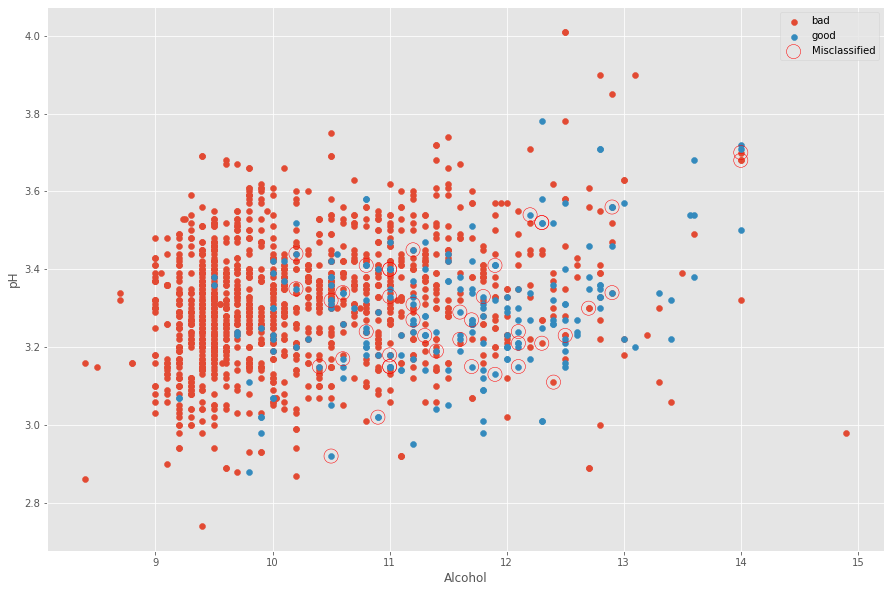

In [37]:
# New plot.
fig, ax = plt.subplots()

# Plot the training data
for species, data in df.groupby('quality'):
    ax.scatter(data['alcohol'], data['pH'], label=species)

# Plot misclassified.
ax.scatter(misclass['alcohol'], misclass['pH'], s=200, facecolor='none', edgecolor='r', label='Misclassified')
    
# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('pH')
ax.legend();

### Separating Setosa

From [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression):

$$\ell = \log_b \frac{p}{1-p} = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$ 

***

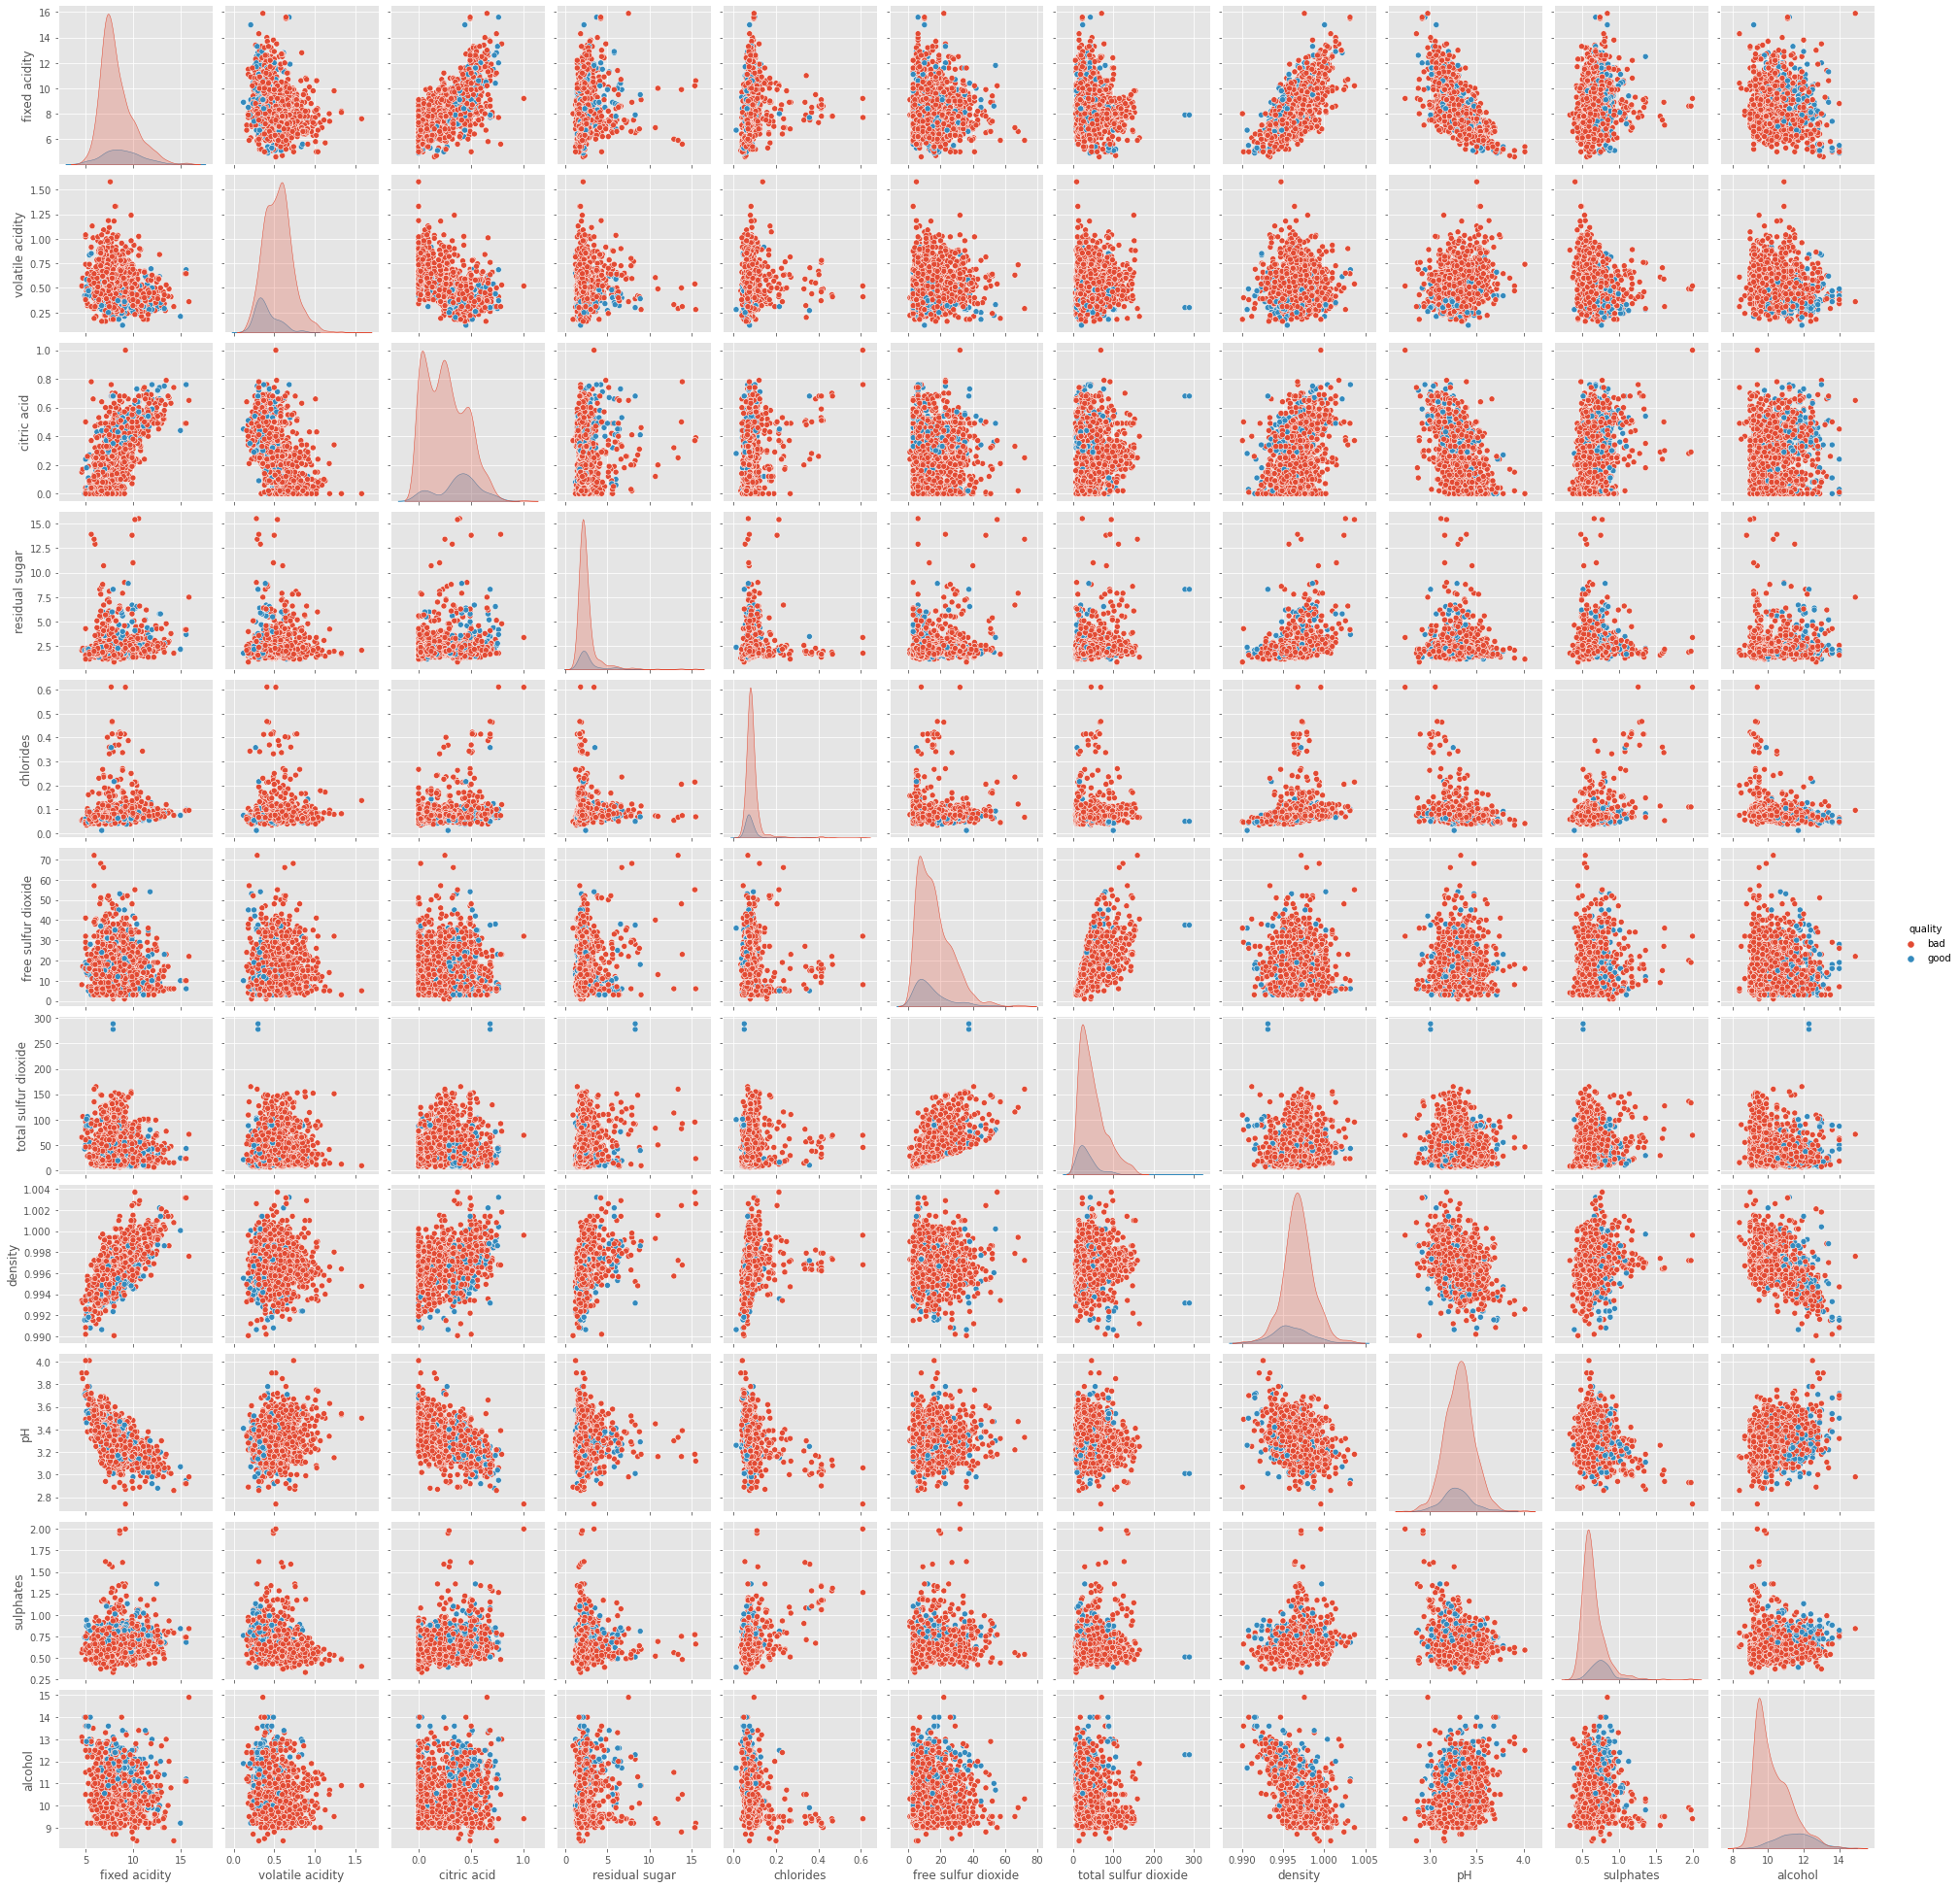

In [38]:
# Another look at the plot.
sns.pairplot(df, hue='quality')

In [39]:
# Give the inputs and outputs convenient names.
inputs = train[['alcohol', 'pH']]

# Set 'versicolor' and 'virginica' to 'other'.
outputs = train['quality'].apply(lambda x: x if x == 'bad' else 'other')

# Eyeball outputs
outputs.unique()

['bad', 'other']
Categories (2, object): ['bad' < 'other']

In [40]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [41]:
actual = test['quality'].apply(lambda x: x if x == 'bad' else 'other')

# What proportion were correct?
lre.score(test[['alcohol', 'pH']], actual)

0.895

### Using All Possible Inputs

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

***

In [42]:
# Load the red wine dataset from UCI Machine Learning Repository
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [43]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [44]:
# Use all 11 possible inputs.
inputs, outputs = train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], train['quality']

In [45]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

C:\Users\kopry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [46]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
predictions

array([6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6,
       6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5,
       5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6,
       6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5,
       5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6,
       5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6,
       6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6,
       6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5,

In [47]:
# Eyeball the misclassifications.
(predictions == test['quality']).value_counts()

True     227
False    173
Name: quality, dtype: int64

In [48]:
# What proportion were correct?
lre.score(test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], test['quality'])

0.5675

### $k$ Nearest Neighbours Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

***

In [49]:
# Load the red wine dataset from UCI Machine Learning Repository
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [50]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [51]:
# Use all 11 possible inputs.
inputs, outputs = train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], train['quality']

In [52]:
# Classifier.
knn = nei.KNeighborsClassifier()

In [53]:
# Fit.
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [54]:
# Test.
knn.score(test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], test['quality'])

0.5125

In [55]:
# Predict.
predictions = lre.predict(test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
(predictions == test['quality']).value_counts()

True     237
False    163
Name: quality, dtype: int64

In [56]:
# The score is just the accuracy in this case.
(predictions == test['quality']).value_counts(normalize=True)

True     0.5925
False    0.4075
Name: quality, dtype: float64

### Cross Validation

https://scikit-learn.org/stable/modules/cross_validation.html

***

In [57]:
knn = nei.KNeighborsClassifier()
scores = mod.cross_val_score(knn, df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], df['quality'])
scores

array([0.446875  , 0.475     , 0.4625    , 0.390625  , 0.43573668])

In [58]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.4421473354231975 	 Standard Deviation: 0.029022497910809644


In [59]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.4421473354231975 	 Standard Deviation: 0.029022497910809644


### End of Classification Analysis

***

## Regression Analysis: Fuel Consumption

[Fuel Consumption](https://www.kaggle.com/sarita19/fuel-consumption) from [Kaggle](https://www.kaggle.com/)

This dataset is about the amount of CO2 emissions by a vehicle depending on their various features.

Using <b>FuelConsumption.csv</b> - the data contains fuel consumption ratings and estimated carbon dioxide emissions

### Setup

***

In [60]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Fancier, statistical plots.
import seaborn as sns

In [61]:
# Plots styles.
plt.style.use('ggplot')

# Plot size.
plt.rcParams['figure.figsize'] = (12, 8)

### Displaying the Fuel Consumption Dataset

***

In [62]:
# Load the vehicle data set
df = pd.read_csv("./FuelConsumption.csv")

In [63]:
# Display the data
df

MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0             AS5        Z                   9.9                  6.7   
1              M6        Z                  11.2                  7.7   
2             AV7        Z                   6.0                  5.8   
3             AS6        Z                  12.7                  9.1   
4             AS6        Z                  12.1                  8.7   
...           ...      ...                   ...                  ...   
1062          AS6        X                  13.4                  9.8   
1063          AS6        X                  13.2                  9.5   
1064          AS6        X                  13.4                  9.8   
1065          AS6        X                  12.9                  9.3   
1066          AS6        X                  14.9                 10.2   

      FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                      8.5                        33           196  
1                      9.6                        29           221  
2                      5.9                        48           136  
3                     11.1                        25           255  
4                     10.6                        27           244  
...                    ...                       ...           ...  
1062                  11.8                        24           271  
1063                  11.5                        25           264  
1064                  11.8                        24           271  
1065                  11.3                        25           260  
1066                  12.8                        22           294  

[1067 rows x 13 columns]

In [64]:
# Summary statistics
df.describe()

MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000   
25%               7.500000              9.000000                 21.000000   
50%               8.800000             10.900000                 26.000000   
75%              10.850000             13.350000                 31.000000   
max              20.500000             25.800000                 60.000000   

       CO2EMISSIONS  
count   1067.000000  
mean     256.228679  
std       63.372304  
min      108.000000  
25%      207.000000  
50%      251.000000  
75%      294.000000  
max      488.000000

In [65]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [66]:
# Display attributes
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [67]:
# Display data overview
df.describe().T

count         mean        std     min      25%  \
MODELYEAR                 1067.0  2014.000000   0.000000  2014.0  2014.00   
ENGINESIZE                1067.0     3.346298   1.415895     1.0     2.00   
CYLINDERS                 1067.0     5.794752   1.797447     3.0     4.00   
FUELCONSUMPTION_CITY      1067.0    13.296532   4.101253     4.6    10.25   
FUELCONSUMPTION_HWY       1067.0     9.474602   2.794510     4.9     7.50   
FUELCONSUMPTION_COMB      1067.0    11.580881   3.485595     4.7     9.00   
FUELCONSUMPTION_COMB_MPG  1067.0    26.441425   7.468702    11.0    21.00   
CO2EMISSIONS              1067.0   256.228679  63.372304   108.0   207.00   

                             50%      75%     max  
MODELYEAR                 2014.0  2014.00  2014.0  
ENGINESIZE                   3.4     4.30     8.4  
CYLINDERS                    6.0     8.00    12.0  
FUELCONSUMPTION_CITY        12.6    15.55    30.2  
FUELCONSUMPTION_HWY          8.8    10.85    20.5  
FUELCONSUMPTION_COMB        10.9    13.35    25.8  
FUELCONSUMPTION_COMB_MPG    26.0    31.00    60.0  
CO2EMISSIONS               251.0   294.00   488.0

### Clean the data

***

In [68]:
# Checking for any missing values

# List of missing values
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [69]:
# Double check, if there is any missing values

# Total sum of missing values
df.isnull().sum().sum()

0

In [70]:
# Remove MODELYEAR column
df.drop(['MODELYEAR'], inplace=True, axis=1)

### Correlation

***

In [71]:
# Correlation
df.corr().T

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  \
ENGINESIZE                  1.000000   0.934011              0.832225   
CYLINDERS                   0.934011   1.000000              0.796473   
FUELCONSUMPTION_CITY        0.832225   0.796473              1.000000   
FUELCONSUMPTION_HWY         0.778746   0.724594              0.965718   
FUELCONSUMPTION_COMB        0.819482   0.776788              0.995542   
FUELCONSUMPTION_COMB_MPG   -0.808554  -0.770430             -0.935613   
CO2EMISSIONS                0.874154   0.849685              0.898039   

                          FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  \
ENGINESIZE                           0.778746              0.819482   
CYLINDERS                            0.724594              0.776788   
FUELCONSUMPTION_CITY                 0.965718              0.995542   
FUELCONSUMPTION_HWY                  1.000000              0.985804   
FUELCONSUMPTION_COMB                 0.985804              1.000000   
FUELCONSUMPTION_COMB_MPG            -0.893809             -0.927965   
CO2EMISSIONS                         0.861748              0.892129   

                          FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
ENGINESIZE                               -0.808554      0.874154  
CYLINDERS                                -0.770430      0.849685  
FUELCONSUMPTION_CITY                     -0.935613      0.898039  
FUELCONSUMPTION_HWY                      -0.893809      0.861748  
FUELCONSUMPTION_COMB                     -0.927965      0.892129  
FUELCONSUMPTION_COMB_MPG                  1.000000     -0.906394  
CO2EMISSIONS                             -0.906394      1.000000

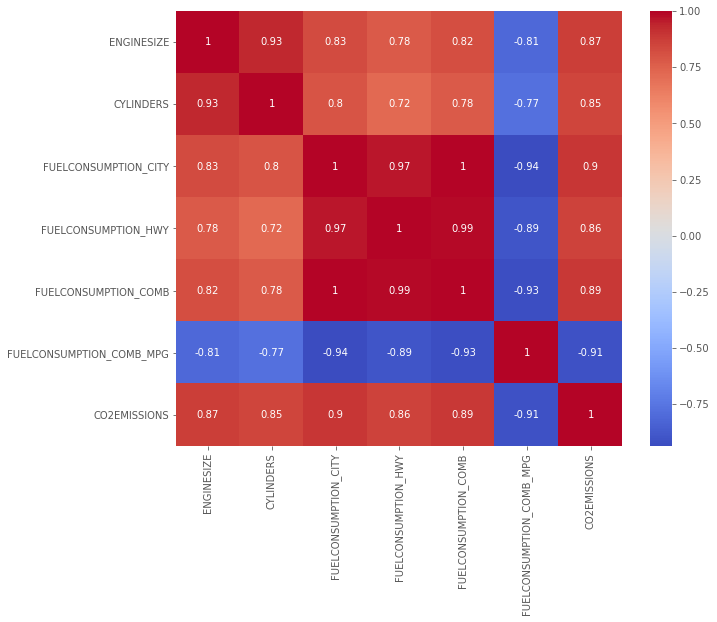

In [72]:
# Heatmap
corr = df.corr()
#Plot figsize
plt.figure(figsize=(10, 8))
# Generate heat map
sns.heatmap(corr,annot=True,cmap="coolwarm")
# Show plot
plt.show()

### Visualize

***

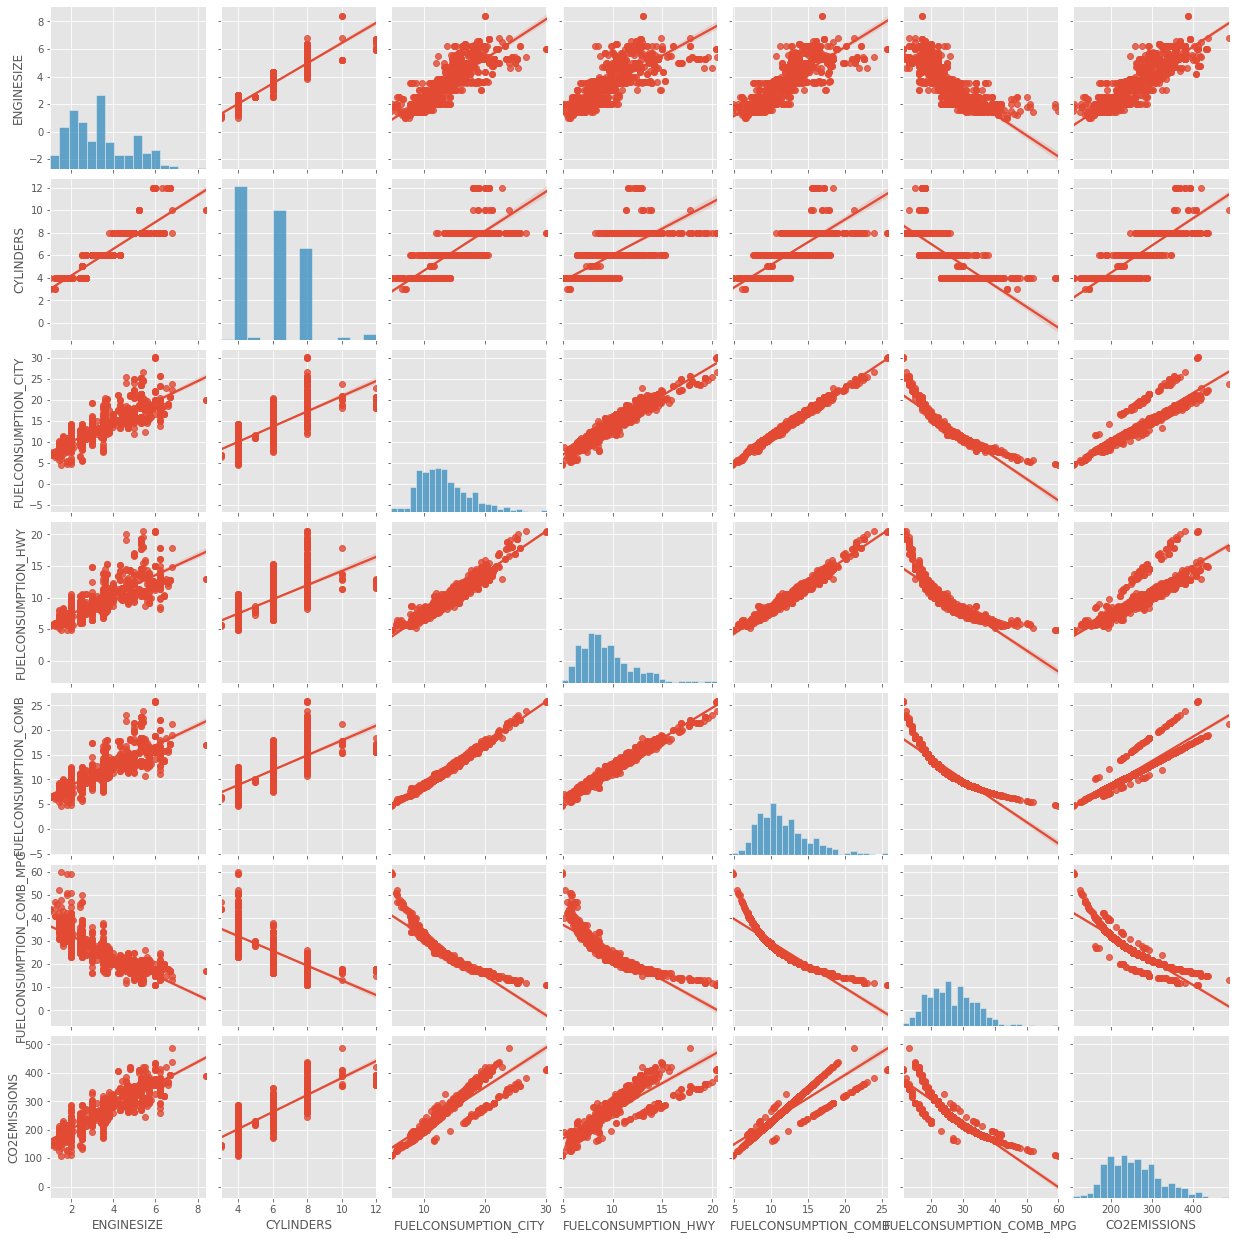

In [73]:
# Scatter plots
sns.pairplot(df, kind="reg")
plt.show()